### Numerical Integration

As we discussed during the week, differentiation is the technical and always manageable task. In the same time calculation of the definite integral by the **fundamental theorem of calculus** requires _integrability in elementary functions_ (which is not guaranteed at all).

Thus the closest one can get to the estimation of such integral is **numerical approximation**.

We propose you to try yourself in this task following our instructions.

## Quick refresher

Assume that we have some nice smooth function $f(x)$ on a segment $[a,b]$.

To compute definite integral, one should consider tagged partition of the segment:
$$
a=x_0<x_1<x_2<\ldots<x_n=b
$$
with tagging $t_i \in [x_{i-1}, x_i]$. We assume uniform grid:
$$
x_i-x_{i-1}=h
$$
Then Riemann sum is an approximation of the integral:
$$
R(t, h)=\sum_{i=1}^n f(t_i) (x_i-x_{i-1})=h \sum_{i=1}^n f(t_i)
$$

![](pic12.png)

### Task 1. Midpoint rule

Let us start with basic imports: we start with `numpy` and `math` to work with arrays and mathematical functions (for `numpy` introduction and playground you can refer to the last week of our course or your Python course):

In [17]:
import numpy as np
from math import *

Also we import and setup a couple of plotting libraries to make life prettier:

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 4.0})
sns.set_palette('cubehelix')

%matplotlib inline

Now we ask you to implement midpoint rule:

![](pic13.png)

In other words: 
$$
t_i=\frac{x_{i-1}+x_i}{2}
$$
$$
\int_a^b f(x)dx \approx \frac{b-a}{n}\sum_{i=1}^n f\left( \frac{x_{i-1}+x_i}{2} \right) 
$$

Write the function
```
def middle(f, a, b, n):
```
that takes as an input function `f` and returns the Riemann sum by midpoint rule:

In [30]:
def middle(f, a, b, n):
    
    dx = float((b-a) / n)
    sum = float()
 
    for i in range(1, n + 1):
        
        # first x_(i-1) + x_i = a + (a + (b-a) / n) = 2*a + dx
        # second 2*a + dx + dx = 2*a + 2*dx
        # ...
        
        midpoint = (2 * a + dx * (2 * i - 1)) / 2
        sum += f(midpoint)
        
    I = sum * dx
        
    return I

Run the following cell to get automatic basic check of your function (do not change it!):

In [31]:
import checker
checker.exact_checker(middle)

Test 1  |::|  err= 1.00783358958e-05   |::|   time= 4.410743713378906e-05 s
Test 1  |::|  accuracy OK
Test 2  |::|  err= 0.000801769309934   |::|   time= 5.793571472167969e-05 s
Test 2  |::|  accuracy OK
Test 3  |::|  err= 2.49909183769e-06   |::|   time= 9.369850158691406e-05 s
Test 3  |::|  accuracy OK
Passed:  3 /3


### Task 2. Plot the result

Let us also plot a nice picture here. Consider $f(x)=\cos(x)$, $[a,b]=[0, \pi/2]$ and $n=10$. Plot the functions, midpoints, and corresponding reactangles (it is useful to use command `plt.bar`). You should get something like this: 

![](res.png)

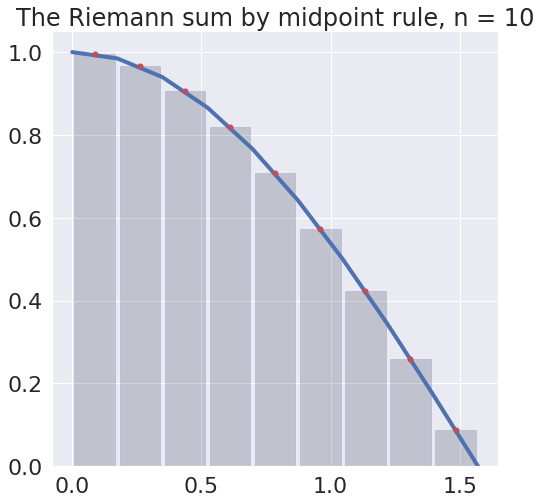

In [32]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.cos(x)
a = 0
b = np.pi/2.0
n = 10

x = np.linspace(a, b, n)
y = f(x)

plt.figure(figsize=(8, 8))

plt.plot(x, y, 'b')

x_mid = (x[:-1] + x[1:])/2.0
y_mid = f(x_mid)

plt.plot(x_mid, y_mid, 'r.', markersize=10)
plt.bar(x_mid, y_mid, width=(b-a)/n, alpha=0.2, edgecolor='b')

plt.title('The Riemann sum by midpoint rule, n = {}'.format(n))

plt.show()


### Task 3. Trapezoidal rule

The idea here is easily formulated by the picture:
![](pic11.png)
We approximate each segment with trapezoidal area:
$$
\int_a^b f(x)dx=\frac{b-a}{n}\sum_{i=1}^{n} \frac{f(x_{i-1})+f(x_i)}{2}=\frac{b-a}{n}\left(\frac{f(a)+f(b)}{2}+\sum_{i=1}^{n-1} f(x_i)\right)
$$
(basically we use the formula for the area of trapezoidal polygon $S=h\cdot(x+y)/2$ where $h$ is the height of the figure and $x$ and $y$ are lengths of parallel sides).

Write the implementation of the formula:

In [33]:
def trapezoidal(f, a, b, n):
    
    dx = float((b - a) / n)
    
    sum = float()
    
    sum += f(a) / 2
    
    for i in range(1, n):
        sum += f(a + i * dx)
    sum += f(b) / 2
    
    I = sum * dx
    
    return I

Run the following cell to get automatic basic check of your function (do not change it!):

In [34]:
checker.exact_checker(trapezoidal)

Test 1  |::|  err= 2.01566108483e-05   |::|   time= 3.719329833984375e-05 s
Test 1  |::|  accuracy OK
Test 2  |::|  err= 0.00140986862456   |::|   time= 4.696846008300781e-05 s
Test 2  |::|  accuracy OK
Test 3  |::|  err= 4.75384852727e-06   |::|   time= 8.0108642578125e-05 s
Test 3  |::|  accuracy OK
Passed:  3 /3


### Task 4. Simpson's rule

To proceed with the Simpson's rule, we need to improve on the general idea of Riemann sum approximation. Assume the restriction of the function on a segement $[x_{i-1}, x_i]$: instead of using the definition, one could try to approximate given function by one simpler and easier to integrate. 

Simpson's rule uses approximation by the parabolic function per each segment. In order to it, one needs **three** points -- e.g., $f(x_i)$, $f(x_{i+1}$ and $f\left(\frac{x_{i}+x_{i+1}}{2} \right)$ (the general function is described by $ax^2+bx+c$ with three parameters; following linear algebra's _Rank theorem_, one would need at least three linarly independent equations to find those parameters).
![](pic14.png)
Then approximation can be written as follows:
$$
\int_a^b f(x)dx=\frac{b-a}{3n}\left(\sum_{i=1}^{[n/2]} f(x_{2i-2})+4f(x_{2i-1})+f(x_{2i})\right)
$$

Write the implementation of the formula. 

**Note**: the commulitive formula will work for odd $n$ only, that's fine! (It doesn't mean that in the even case Simpson's rule is inadequate; it is just unpleasant to implement).

In [35]:
def simpson(f, a, b, n):
    sum = float()
    sum = f(a) + f(b)
    
    dx = float(b - a) / (2*n)
    
    sum_odd = float()
    sum_even = float()
    
    for i in range(1, n):  
        sum_odd += f(2 * dx * i + a)
    sum += 2 * sum_odd
    
    for i in range(1, n+1):
        sum_even += f(dx * (2 * i -1) + a)
    sum += 4 * sum_even
    
    I = sum * dx / 3
    
    return I

Run the following cell to get automatic basic check of your function (do not change it!):

In [36]:
checker.exact_checker(simpson)

Test 1  |::|  err= 2.031463886e-11   |::|   time= 7.176399230957031e-05 s
Test 1  |::|  accuracy OK
Test 2  |::|  err= 0.00100446908148   |::|   time= 9.083747863769531e-05 s
Test 2  |::|  accuracy OK
Test 3  |::|  err= 8.14450491493e-08   |::|   time= 0.00016236305236816406 s
Test 3  |::|  accuracy OK
Passed:  3 /3


## Error estimations

Using **Taylor expansion** of the integrand function, one can establish following estimates of the global errors of the numerical methods.

| **Method** |  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  **Formula**   &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;        | **Error**  |&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;     **Constant**    &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  |
|---|:--------------------------:|---|---------|
| _Middle Point_  | $\frac{b-a}{n}\sum_{i=1}^n f\left( \frac{x_{i-1}+x_i}{2} \right) $  |  $\frac{(b-a)^3}{12n^2}C$  | $\max_{[a,b]} |f^{(2)}(x)|$ |
| _Trapezoidal_  | $\frac{b-a}{n}\left(\frac{f(a)+f(b)}{2}+\sum_{i=1}^{n-1} f(x_i)\right)$ | $\frac{(b-a)^3}{12n^2}C$  | $\max_{[a,b]} |f^{(2)}(x)|$ |
| _Simpson's rule_  | $\frac{b-a}{3n}\left(\sum_{i=1}^{[n/2]} f(x_{2i-2})+4f(x_{2i-1})+f(x_{2i})\right)$ | $\frac{(b-a)^5}{180n^4}C $  | $\max_{[a,b]} |f^{(4)}(x)|$  |

Let us check this formula in terms of adequacy for both included derivative and order of the $n$.

### Task 5. Error and the derivative

Assume $[a,b]=[0,1]$ and $n=100$. Consider the function $f(x)=e^{ax}$ with varying $a$.
1. Compute exact value of the integral $\int_0^1 e^{ax} dx$ analytically (variable `exact`)
2. Compute and plot errors for **trapezoidal rule** with respect to $a$:

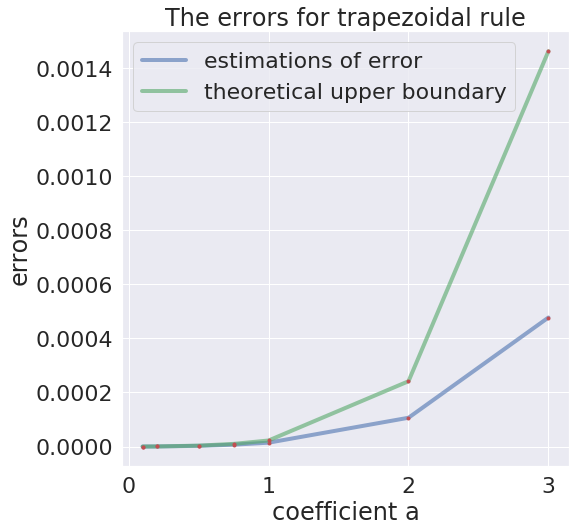

In [37]:
coefs=[0.1, 0.2, 0.5, 0.75, 1.0, 2.0, 3.0]
errs=[]
dev2_f_value = []
theoretical_upper_boundary = []


for a in coefs:  
    exact = (np.e**a - 1) / a
    I = trapezoidal(lambda x: np.e**(a*x), 0, 1, 100)
    err = abs(exact - I)
    errs.append(err)
    
    x = np.arange(0, 1, 1/100)

    for i in x:
        dev2_f_value.append(a**2*np.e**(a*i))
    max_dev2_f = max(dev2_f_value)
    theoretical_upper_boundary.append((1 - 0)**3 * max_dev2_f / (12 * 100**2)) # a = 0, b = 1, n = 100
                    

plt.figure(figsize=(8, 8))

plt.plot(coefs, errs, 'b', alpha=0.6, label='estimations of error')
plt.plot(coefs, errs, 'r.')
plt.plot(coefs, theoretical_upper_boundary, 'g', alpha=0.6, label='theoretical upper boundary')
plt.plot(coefs, theoretical_upper_boundary, 'r.')

plt.title('The errors for trapezoidal rule')
plt.ylabel('errors')   
plt.xlabel('coefficient a')
plt.legend()
plt.show()

### Task 6. Error and number of steps

Assume $[a,b]=[0,\pi/2]$. Consider the function $f(x)=\sin{x}$.
1. Compute exact value of the integral $\int_0^{\pi/2} \sin{x} dx$ analytically (variable `exact`)
2. Compute and plot errors for different values of $n$ for **all three methods**:

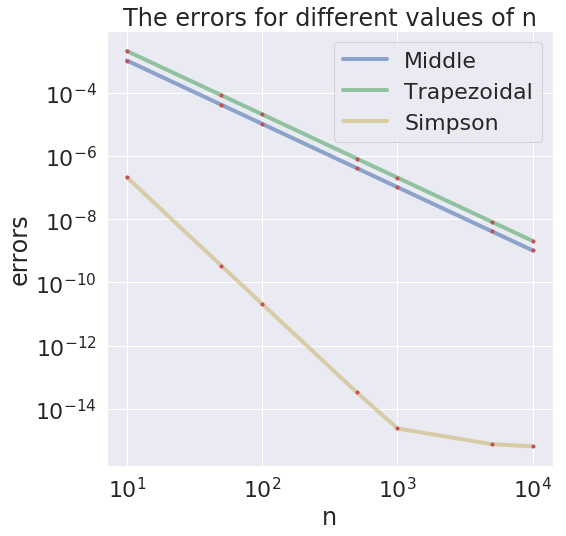

In [38]:
ns=[10, 50, 100, 500, 1000, 5000, 10000]
errs_mp=[]
errs_trap=[]
errs_simp=[]

# integral = -cos(x)
# integral (0, pi/2) = 1

f = lambda x: np.sin(x) 
a = 0
b = np.pi/2

exact=1

for n in ns:
    er_m = abs(exact - middle(f, a, b, n))
    er_t = abs(exact - trapezoidal(f, a, b, n))
    er_s = abs(exact - simpson(f, a, b, n))
    errs_mp.append(er_m)
    errs_trap.append(er_t)
    errs_simp.append(er_s)
    
fig = plt.figure(figsize=(8,8))  
ax = fig.add_subplot(1, 1, 1)

ax.plot(ns, errs_mp, 'b', alpha=0.6, label='Middle')
ax.plot(ns, errs_mp, 'r.')
ax.plot(ns, errs_trap, 'g', alpha=0.6, label='Trapezoidal')
ax.plot(ns, errs_trap, 'r.')
ax.plot(ns, errs_simp, 'y', alpha=0.6, label='Simpson')
ax.plot(ns, errs_simp, 'r.')

plt.title('The errors for different values of n')
plt.ylabel('errors')   
plt.xlabel('n')

ax.set_yscale('log')
ax.set_xscale('log')
plt.legend(loc='best')
plt.show()


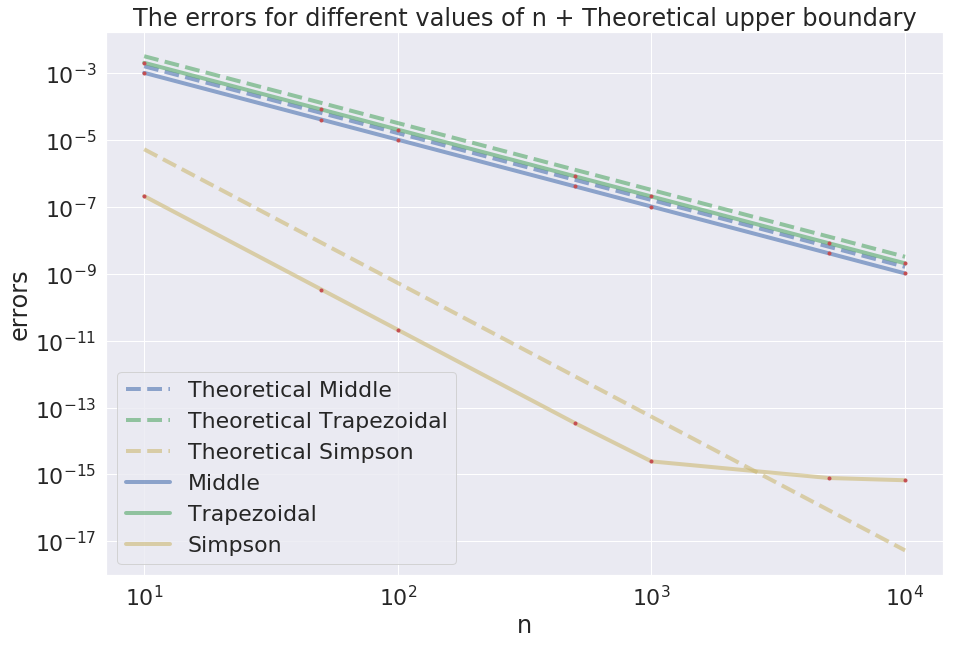

In [39]:
ns=[10, 50, 100, 500, 1000, 5000, 10000]

f = lambda x: np.sin(x) 
a = 0
b = np.pi/2

exact=1

errs_mp=[]
errs_trap=[]
errs_simp=[]

t_m=[]
t_t=[]
t_s=[]

def max_der(a, b, n):
    deriv = lambda x: abs(-(sin(x)))
    x = np.linspace(a, b, n)
    return max(np.vectorize(deriv)(x))

def theor_m(a, b, n):
    const = max_der(a, b, n)
    return (((b-a)**3)/(24*(n**2)))*const

def theor_t(a, b, n):
    const = max_der(a, b, n)
    return (((b-a)**3)/(12*(n**2)))*const

def theor_s(a, b, n):
    const = max_der(a, b, n)
    return (((b-a)**5)/(180*(n**4)))*const

for n in ns:
    t_m.append(theor_m(a, b, n))
    t_t.append(theor_t(a, b, n))
    t_s.append(theor_s(a, b, n))
    
    er_m = abs(exact - middle(f, a, b, n))
    er_t = abs(exact - trapezoidal(f, a, b, n))
    er_s = abs(exact - simpson(f, a, b, n))
    errs_mp.append(er_m)
    errs_trap.append(er_t)
    errs_simp.append(er_s)


#print(*ns)
#print(*theor_errs_mp)
fig = plt.figure(figsize=(15,10)) 
ax = fig.add_subplot(1, 1, 1)

ax.plot(ns, t_m, 'b--', alpha=0.6, label='Theoretical Middle')
ax.plot(ns, t_t, 'g--', alpha=0.6, label='Theoretical Trapezoidal')
ax.plot(ns, t_s, 'y--', alpha=0.6, label='Theoretical Simpson')

ax.plot(ns, errs_mp, 'b', alpha=0.6, label='Middle')
ax.plot(ns, errs_mp, 'r.')
ax.plot(ns, errs_trap, 'g', alpha=0.6, label='Trapezoidal')
ax.plot(ns, errs_trap, 'r.')
ax.plot(ns, errs_simp, 'y', alpha=0.6, label='Simpson')
ax.plot(ns, errs_simp, 'r.')

plt.title('The errors for different values of n + Theoretical upper boundary')
plt.ylabel('errors')   
plt.xlabel('n')

ax.set_yscale('log')
ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

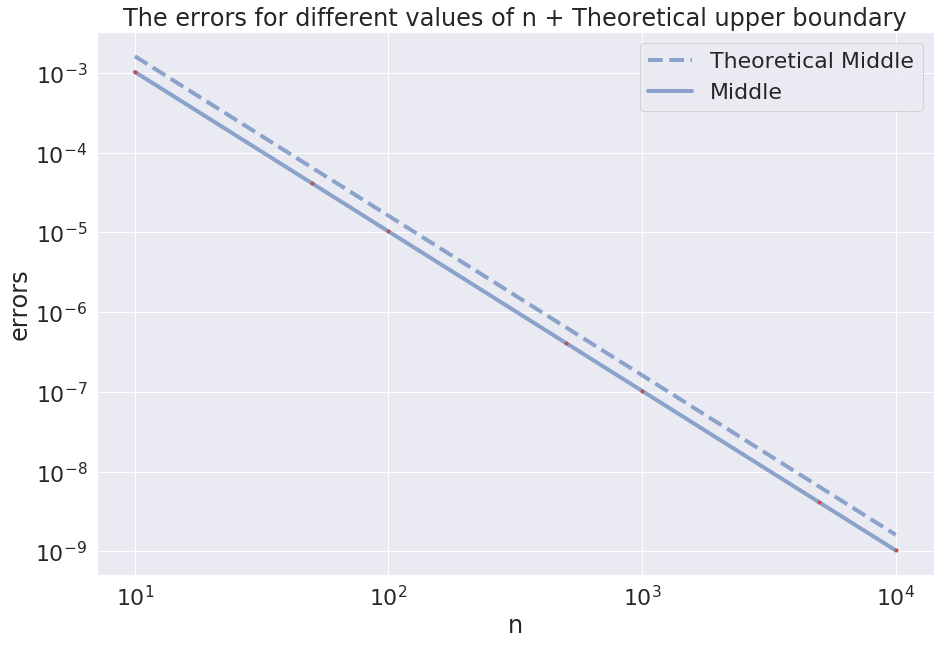

In [40]:
ns=[10, 50, 100, 500, 1000, 5000, 10000]

f = lambda x: np.sin(x) 
a = 0
b = np.pi/2

exact=1

errs_mp=[]
errs_trap=[]
errs_simp=[]

t_m=[]
t_t=[]
t_s=[]

def max_der(a, b, n):
    deriv = lambda x: abs(-(sin(x)))
    x = np.linspace(a, b, n)
    return max(np.vectorize(deriv)(x))

def theor_m(a, b, n):
    const = max_der(a, b, n)
    return (((b-a)**3)/(24*(n**2)))*const


for n in ns:
    t_m.append(theor_m(a, b, n)) 
    er_m = abs(exact - middle(f, a, b, n))
    errs_mp.append(er_m)


fig = plt.figure(figsize=(15,10)) 
ax = fig.add_subplot(1, 1, 1)

ax.plot(ns, t_m, 'b--', alpha=0.6, label='Theoretical Middle')
ax.plot(ns, errs_mp, 'b', alpha=0.6, label='Middle')
ax.plot(ns, errs_mp, 'r.')

plt.title('The errors for different values of n + Theoretical upper boundary')
plt.ylabel('errors')   
plt.xlabel('n')

ax.set_yscale('log')
ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

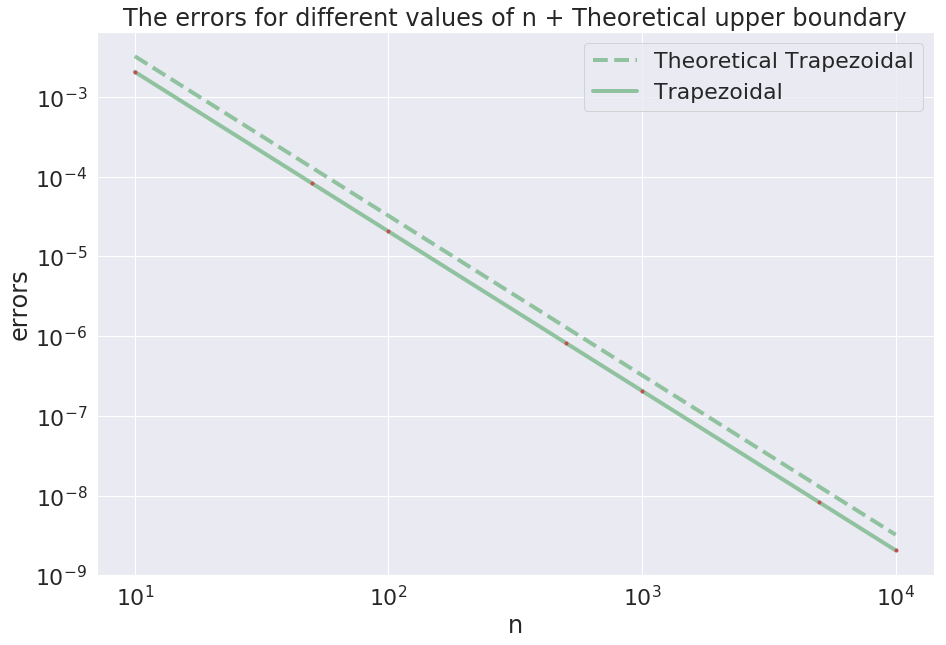

In [41]:
ns=[10, 50, 100, 500, 1000, 5000, 10000]

f = lambda x: np.sin(x) 
a = 0
b = np.pi/2

exact=1

errs_trap=[]
t_t=[]


def max_der(a, b, n):
    deriv = lambda x: abs(-(sin(x)))
    x = np.linspace(a, b, n)
    return max(np.vectorize(deriv)(x))

def theor_t(a, b, n):
    const = max_der(a, b, n)
    return (((b-a)**3)/(12*(n**2)))*const

for n in ns:
    t_t.append(theor_t(a, b, n))
    er_t = abs(exact - trapezoidal(f, a, b, n))
    errs_trap.append(er_t)


fig = plt.figure(figsize=(15,10)) 
ax = fig.add_subplot(1, 1, 1)

ax.plot(ns, t_t, 'g--', alpha=0.6, label='Theoretical Trapezoidal')
ax.plot(ns, errs_trap, 'g', alpha=0.6, label='Trapezoidal')
ax.plot(ns, errs_trap, 'r.')

plt.title('The errors for different values of n + Theoretical upper boundary')
plt.ylabel('errors')   
plt.xlabel('n')

ax.set_yscale('log')
ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

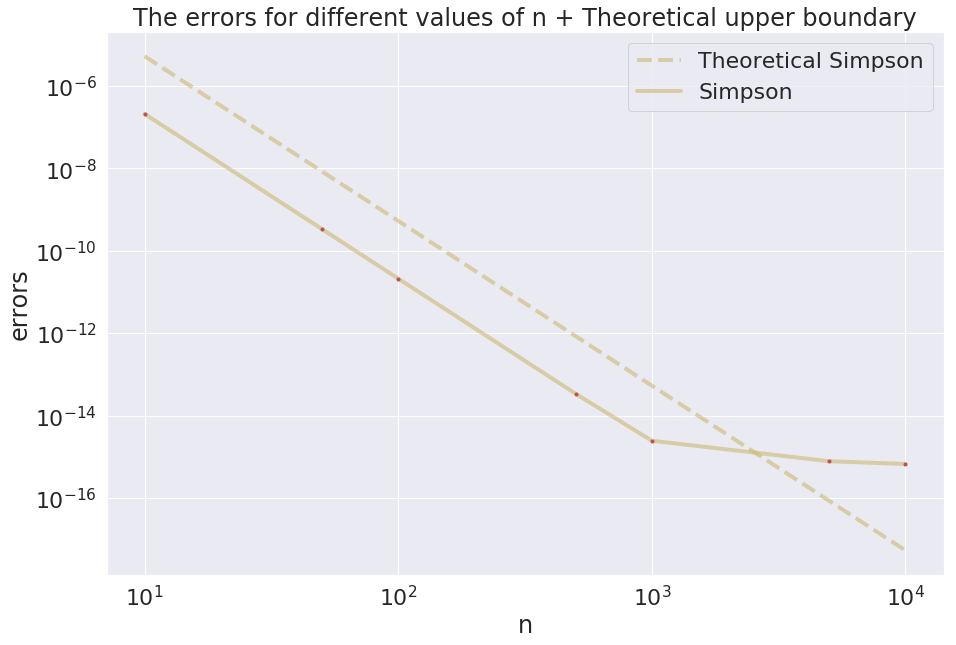

In [42]:
ns=[10, 50, 100, 500, 1000, 5000, 10000]

f = lambda x: np.sin(x) 
a = 0
b = np.pi/2

exact=1

errs_simp=[]
t_s=[]

def max_der(a, b, n):
    deriv = lambda x: abs(-(sin(x)))
    x = np.linspace(a, b, n)
    return max(np.vectorize(deriv)(x))

def theor_s(a, b, n):
    const = max_der(a, b, n)
    return (((b-a)**5)/(180*(n**4)))*const

for n in ns:
    t_s.append(theor_s(a, b, n))
    er_s = abs(exact - simpson(f, a, b, n))
    errs_simp.append(er_s)


fig = plt.figure(figsize=(15,10)) 
ax = fig.add_subplot(1, 1, 1)

ax.plot(ns, t_s, 'y--', alpha=0.6, label='Theoretical Simpson')
ax.plot(ns, errs_simp, 'y', alpha=0.6, label='Simpson')
ax.plot(ns, errs_simp, 'r.')

plt.title('The errors for different values of n + Theoretical upper boundary')
plt.ylabel('errors')   
plt.xlabel('n')

ax.set_yscale('log')
ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

In [43]:
# Test for Question 1 Task 7
import sympy as sym
from sympy import *

def derivative(function):
    print(function.diff(x))
    return function.diff(x)


x = sym.Symbol('x')
f = x**x
dev_f = derivative(f)
dev2_f = derivative(dev_f)
dev3_f = derivative(dev2_f)
dev4_f = derivative(dev3_f)

d2x = diff(dev2_f, x)
d2dx = lambdify(x, dev2_f)

d4x = diff(dev4_f, x)
d4dx = lambdify(x, dev4_f)


a = 0.01
b = 2
n = 10

dev2_f_value = []
dev4_f_value = []

x = np.arange(a, b, 1/n)

for i in x:
    dev2_f_value.append(d2dx(i))
    dev4_f_value.append(d4dx(i))
    

max_dev2_f = max(dev2_f_value)
max_dev4_f = max(dev4_f_value)
print(max_dev2_f)
print(max_dev4_f)
 

errs_mp = (b - a)**3 * max_dev2_f / (24 * n**2)
errs_trap = (b - a)**3 * max_dev2_f / (12 * n**2)
errs_simp = (b - a)**5 * max_dev4_f / (180 * n**4)

print(errs_mp, errs_trap, errs_simp)

x**x*(log(x) + 1)
x**x*(log(x) + 1)**2 + x**x/x
x**x*(log(x) + 1)**3 + 3*x**x*(log(x) + 1)/x - x**x/x**2
x**x*(log(x) + 1)**4 + 6*x**x*(log(x) + 1)**2/x - 4*x**x*(log(x) + 1)/x**2 + 3*x**x/x**2 + 2*x**x/x**3
107.911537968
2083960.07473
0.354336482582 0.708672965163 36.1311904788


In [44]:
# Test for Question 1 Task 7
from scipy import integrate
def f(x):
    return x**x
v, err = integrate.quad(f, 0.001, 2)
print(v)

2.832880440388939


x**x*(log(x) + 1)
x**x*(log(x) + 1)**2 + x**x/x
x**x*(log(x) + 1)**3 + 3*x**x*(log(x) + 1)/x - x**x/x**2
x**x*(log(x) + 1)**4 + 6*x**x*(log(x) + 1)**2/x - 4*x**x*(log(x) + 1)/x**2 + 3*x**x/x**2 + 2*x**x/x**3


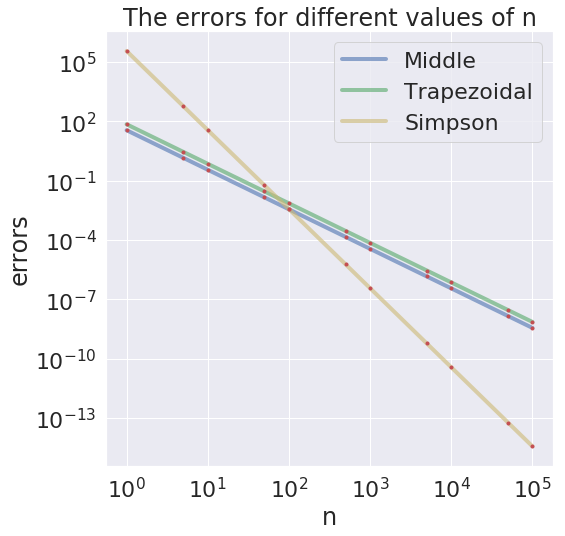

In [45]:
# Test  Question 1 Task 7
import sympy as sym
from sympy import *

def derivative(function):
    print(function.diff(x))
    return function.diff(x)


x = sym.Symbol('x')
f = x**x
dev_f = derivative(f)
dev2_f = derivative(dev_f)
dev3_f = derivative(dev2_f)
dev4_f = derivative(dev3_f)

d2x = diff(dev2_f, x)
d2dx = lambdify(x, dev2_f)

d4x = diff(dev4_f, x)
d4dx = lambdify(x, dev4_f)

a = 0.01
b = 2

ns=[1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000]
errs_mp=[]
errs_trap=[]
errs_simp=[]

for n in ns:
    x = np.arange(a, b, 1/n)
    dev2_f_value = []
    dev4_f_value = []

    for i in x:
        dev2_f_value.append(d2dx(i))
        dev4_f_value.append(d4dx(i))
    
    max_dev2_f = max(dev2_f_value)
    max_dev4_f = max(dev4_f_value)

    err_mp = (b - a)**3 * max_dev2_f / (24 * n**2)
    err_trap = (b - a)**3 * max_dev2_f / (12 * n**2)
    err_simp = (b - a)**5 * max_dev4_f / (180 * n**4)
    
    errs_mp.append(err_mp)
    errs_trap.append(err_trap)
    errs_simp.append(err_simp)

    
fig = plt.figure(figsize=(8,8))  
ax = fig.add_subplot(1, 1, 1)

ax.plot(ns, errs_mp, 'b', alpha=0.6, label='Middle')
ax.plot(ns, errs_mp, 'r.')
ax.plot(ns, errs_trap, 'g', alpha=0.6, label='Trapezoidal')
ax.plot(ns, errs_trap, 'r.')
ax.plot(ns, errs_simp, 'y', alpha=0.6, label='Simpson')
ax.plot(ns, errs_simp, 'r.')

plt.title('The errors for different values of n')
plt.ylabel('errors')   
plt.xlabel('n')

ax.set_yscale('log')
ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

x**x*(log(x) + 1)
x**x*(log(x) + 1)**2 + x**x/x
x**x*(log(x) + 1)**3 + 3*x**x*(log(x) + 1)/x - x**x/x**2
x**x*(log(x) + 1)**4 + 6*x**x*(log(x) + 1)**2/x - 4*x**x*(log(x) + 1)/x**2 + 3*x**x/x**2 + 2*x**x/x**3


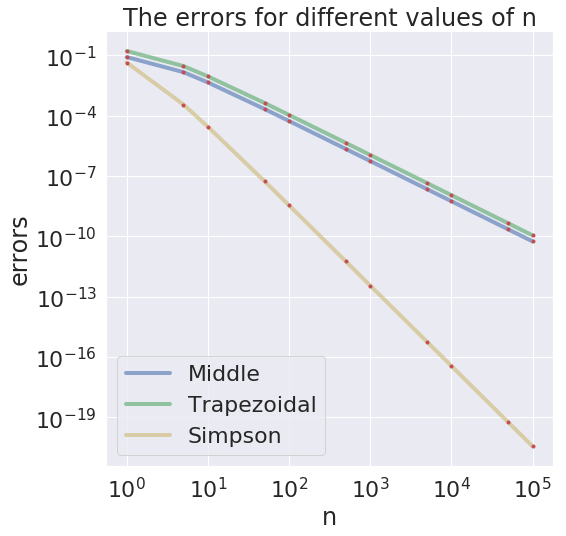

In [46]:
# Test for Question 1 Task 7
import sympy as sym
from sympy import *

def derivative(function):
    print(function.diff(x))
    return function.diff(x)


x = sym.Symbol('x')
f = x**x
dev_f = derivative(f)
dev2_f = derivative(dev_f)
dev3_f = derivative(dev2_f)
dev4_f = derivative(dev3_f)

d2x = diff(dev2_f, x)
d2dx = lambdify(x, dev2_f)

d4x = diff(dev4_f, x)
d4dx = lambdify(x, dev4_f)

a = 1
b = 2

ns=[1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000]
errs_mp=[]
errs_trap=[]
errs_simp=[]

for n in ns:
    x = np.arange(a, b, 1/n)
    dev2_f_value = []
    dev4_f_value = []

    for i in x:
        dev2_f_value.append(d2dx(i))
        dev4_f_value.append(d4dx(i))
    
    max_dev2_f = max(dev2_f_value)
    max_dev4_f = max(dev4_f_value)

    err_mp = (b - a)**3 * max_dev2_f / (24 * n**2)
    err_trap = (b - a)**3 * max_dev2_f / (12 * n**2)
    err_simp = (b - a)**5 * max_dev4_f / (180 * n**4)
    
    errs_mp.append(err_mp)
    errs_trap.append(err_trap)
    errs_simp.append(err_simp)

    
fig = plt.figure(figsize=(8,8))  
ax = fig.add_subplot(1, 1, 1)

ax.plot(ns, errs_mp, 'b', alpha=0.6, label='Middle')
ax.plot(ns, errs_mp, 'r.')
ax.plot(ns, errs_trap, 'g', alpha=0.6, label='Trapezoidal')
ax.plot(ns, errs_trap, 'r.')
ax.plot(ns, errs_simp, 'y', alpha=0.6, label='Simpson')
ax.plot(ns, errs_simp, 'r.')

plt.title('The errors for different values of n')
plt.ylabel('errors')   
plt.xlabel('n')

ax.set_yscale('log')
ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

x**x*(log(x) + 1)
x**x*(log(x) + 1)**2 + x**x/x
x**x*(log(x) + 1)**3 + 3*x**x*(log(x) + 1)/x - x**x/x**2
x**x*(log(x) + 1)**4 + 6*x**x*(log(x) + 1)**2/x - 4*x**x*(log(x) + 1)/x**2 + 3*x**x/x**2 + 2*x**x/x**3


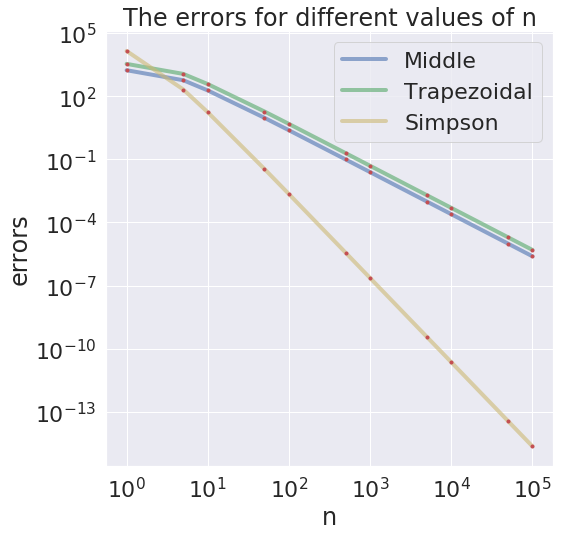

In [47]:
# Test for Question 1 Task 7
import sympy as sym
from sympy import *

def derivative(function):
    print(function.diff(x))
    return function.diff(x)


x = sym.Symbol('x')
f = x**x
dev_f = derivative(f)
dev2_f = derivative(dev_f)
dev3_f = derivative(dev2_f)
dev4_f = derivative(dev3_f)

d2x = diff(dev2_f, x)
d2dx = lambdify(x, dev2_f)

d4x = diff(dev4_f, x)
d4dx = lambdify(x, dev4_f)

a = 2
b = 5

ns=[1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000]
errs_mp=[]
errs_trap=[]
errs_simp=[]

for n in ns:
    x = np.arange(a, b, 1/n)
    dev2_f_value = []
    dev4_f_value = []

    for i in x:
        dev2_f_value.append(d2dx(i))
        dev4_f_value.append(d4dx(i))
    
    max_dev2_f = max(dev2_f_value)
    max_dev4_f = max(dev4_f_value)

    err_mp = (b - a)**3 * max_dev2_f / (24 * n**2)
    err_trap = (b - a)**3 * max_dev2_f / (12 * n**2)
    err_simp = (b - a)**5 * max_dev4_f / (180 * n**4)
    
    errs_mp.append(err_mp)
    errs_trap.append(err_trap)
    errs_simp.append(err_simp)

    
fig = plt.figure(figsize=(8,8))  
ax = fig.add_subplot(1, 1, 1)

ax.plot(ns, errs_mp, 'b', alpha=0.6, label='Middle')
ax.plot(ns, errs_mp, 'r.')
ax.plot(ns, errs_trap, 'g', alpha=0.6, label='Trapezoidal')
ax.plot(ns, errs_trap, 'r.')
ax.plot(ns, errs_simp, 'y', alpha=0.6, label='Simpson')
ax.plot(ns, errs_simp, 'r.')

plt.title('The errors for different values of n')
plt.ylabel('errors')   
plt.xlabel('n')

ax.set_yscale('log')
ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

## Task 7. Results

Answer following questions in the field below:
1. By comparing three method which one is best to use for the function $x^x$?
2. Does estimations of error for $e^{ax}$ coincide with theoretical upper boundary per $a$? If not, where is the problem?
3. Does estimations of error for $\sin {x}$ coincide with theoretical upper boundary per $n$? If not, where is the problem?

### 1. Question 1

We have three methods.

-- On the one hand, the error formulae for **Midpoint Riemann sum** and **Trapezoid Rule** is inversely **proportional to $N^{2}$**. 
Simpson's rule gives us the error  **proportional to $N^{4}$**. 

-- In the case when the function is set analytically, it is preferable to use the Midpoint method rather than the Trapezoid method. 

-- Simpson's formulas are also a good method for calculating the definite integral for a sufficient number of times a continuously differentiable function. BUT the algebraic order of accuracy of the method is 3 and Simpson's formula is exact for polynomials of at most third degree. 

-- Also, **the accuracy of the method is influenced by the value of the fourth derivative function**. That is, the method works well provided that the fourth derivative is not very large.


-- In our case, the fourth derivative, depending on the considered interval, can take on rather large values.

   For example, if the method is used with the values **a = 0.01, b = 2, n = 10**, the value 4 of the derivative will be **2083960.07473**, which will give us an estimate of **the Simpson method** **36.1311904788**, when for **the Midpoint method** the estimate will be **0.354336482582**.


#### Conclusion:
**For the stability of the result obtained, in this case, it is better to use the midpoint method.**

Note: Above there are graphs for calculating the error of the methods in case of changing the step and interval.
The specified function has a singularity at zero and when using the Simson method on an interval close to 0 with a small calculation step, they have a large error. In a situation where we move away from point 0 and increase the step of the method, the calculations are very good. Therefore, using the Simson method to obtain a good result is also possible, but depending on what interval and with what step.





### 2. Question 2

**The estimations of error** for $e^{ax}$ **do not coincide with theoretical upper boundary per a**. More precisely, for small values of the a parameter, these values are quite close, but with an increase in the value of parameter a, the difference between them increases. 

The rationale for this is to compute the upper value of the method error. The error estimate of the method (upper theoretical boundary) includes the value of the second derivative of the function. In this case, the value of the derivative is $a^{2}e^{ax}$. That is, when **the value of a is increased**, **the value of the derivative increases** as well, therefore, the value of the theoretical upper boundary increases.


### 3. Question 3
**The estimations of error** for $\sin {x}$ is close enough to **the theoretical upper boundary  per $n$**. According to the estimation of the methods, the errors of the methods are inversely proportional to $n^{2}$, $n^{2}$ and $n^{4}$ (Middle, Trapezoidal, Simpson). That is, with an increase in the step of the method, the error of the method decreases and more accurate values of the integral are obtained. Also, the number of dividing points of the interval increases with increasing n, which improves the result. Thus, both the estimations error and the theoretical one decrease with increasing n.

This works in the general case, from the above experiments we can see that this is true for Middle, Trapezoidal calculations. 
For Simpon's method, we can see when errors are less than ${10}^{-15}$ it is different. This can be explained by insufficiently correct written code, as well as by the influence of a computer error in calculations when working with sufficiently small values.